In [1]:
import glob
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch

from data_loader import Triplet_Dataset
from model import TripletNet

In [2]:
val_dataset = Triplet_Dataset(
    img_dir='../data/val',
    img_size=64
)

val_dataloader = torch.utils.data.DataLoader(
    val_dataset, 
    batch_size=1,
    shuffle=True
)

In [3]:
model = TripletNet()
model.load_state_dict(torch.load('saved_models/baseline_emb81.pt'))

<All keys matched successfully>

In [4]:
def display_data_dict(data_dict):
    anc_img = data_dict['anc_img']
    pos_img = data_dict['pos_img']
    neg_img = data_dict['neg_img']
    img_lst = [anc_img, pos_img, neg_img]
    
    pos_label = data_dict['pos_label']
    neg_label = data_dict['neg_label']
    
    
    anc_pred = model.predict(anc_img).detach().numpy()
    pos_pred = model.predict(pos_img).detach().numpy()
    neg_pred = model.predict(neg_img).detach().numpy()
    
#     for i in range(3):
#         img = np.transpose(np.array(img_lst[i]), (0,2,3,1))[0]
#         plt.subplot(1,3,i+1)
#         plt.imshow(img)
#         if i<2:
#             plt.title(pos_label)
#         else:
#             plt.title(neg_label)
    
    return anc_pred, pos_pred, neg_pred

In [6]:
pos_scores = []
neg_scores = []

for i, data_dict in enumerate(val_dataloader):
    anc_img = data_dict['anc_img']
    pos_img = data_dict['pos_img']
    neg_img = data_dict['neg_img']

    a,p,n = display_data_dict(data_dict)

    pos_score = np.sum(np.square(a-p))
    pos_scores.append(pos_score)
    neg_score = np.sum(np.square(a-n))
    neg_scores.append(neg_score)
    
    print("Anchor & Pos similarity: {}  ---   Anchor & Neg similarity: {}".format(pos_score, neg_score))
    if pos_score>neg_score:
        print("Pos")
    else:
        print("Neg")

Anchor & Pos similarity: 0.7576488256454468  ---   Anchor & Neg similarity: 0.4736909568309784
Pos
Anchor & Pos similarity: 0.4159989655017853  ---   Anchor & Neg similarity: 0.4814234673976898
Neg
Anchor & Pos similarity: 0.4024823307991028  ---   Anchor & Neg similarity: 0.720788836479187
Neg
Anchor & Pos similarity: 0.4622376561164856  ---   Anchor & Neg similarity: 0.5087497234344482
Neg
Anchor & Pos similarity: 0.4996286630630493  ---   Anchor & Neg similarity: 0.6603325605392456
Neg
Anchor & Pos similarity: 0.31383731961250305  ---   Anchor & Neg similarity: 0.33762532472610474
Neg
Anchor & Pos similarity: 0.5882217288017273  ---   Anchor & Neg similarity: 0.6328408718109131
Neg
Anchor & Pos similarity: 0.713175356388092  ---   Anchor & Neg similarity: 0.8839908838272095
Neg
Anchor & Pos similarity: 0.7858405709266663  ---   Anchor & Neg similarity: 0.5479379892349243
Pos
Anchor & Pos similarity: 0.5748966336250305  ---   Anchor & Neg similarity: 0.4203355610370636
Pos
Anchor & P

Anchor & Pos similarity: 0.7442275285720825  ---   Anchor & Neg similarity: 0.6564195156097412
Pos
Anchor & Pos similarity: 1.1185420751571655  ---   Anchor & Neg similarity: 0.5552025437355042
Pos
Anchor & Pos similarity: 0.7857357263565063  ---   Anchor & Neg similarity: 0.9528715014457703
Neg
Anchor & Pos similarity: 0.5902508497238159  ---   Anchor & Neg similarity: 0.6338014602661133
Neg
Anchor & Pos similarity: 0.5421399474143982  ---   Anchor & Neg similarity: 0.27032235264778137
Pos
Anchor & Pos similarity: 0.5464149713516235  ---   Anchor & Neg similarity: 0.6719546318054199
Neg
Anchor & Pos similarity: 0.7130892872810364  ---   Anchor & Neg similarity: 0.697563111782074
Pos
Anchor & Pos similarity: 0.4455651342868805  ---   Anchor & Neg similarity: 0.5576772689819336
Neg
Anchor & Pos similarity: 0.4432731866836548  ---   Anchor & Neg similarity: 0.6844767332077026
Neg
Anchor & Pos similarity: 0.584577202796936  ---   Anchor & Neg similarity: 0.4412722885608673
Pos
Anchor & Po

Anchor & Pos similarity: 0.39846131205558777  ---   Anchor & Neg similarity: 0.6256597638130188
Neg
Anchor & Pos similarity: 0.5451233983039856  ---   Anchor & Neg similarity: 0.5161148905754089
Pos
Anchor & Pos similarity: 0.5361670851707458  ---   Anchor & Neg similarity: 0.6800416707992554
Neg
Anchor & Pos similarity: 0.5322853326797485  ---   Anchor & Neg similarity: 1.0490827560424805
Neg
Anchor & Pos similarity: 0.7595760226249695  ---   Anchor & Neg similarity: 0.8917791843414307
Neg
Anchor & Pos similarity: 0.4888633191585541  ---   Anchor & Neg similarity: 0.6816074848175049
Neg
Anchor & Pos similarity: 0.45736172795295715  ---   Anchor & Neg similarity: 1.18460214138031
Neg
Anchor & Pos similarity: 0.5954586863517761  ---   Anchor & Neg similarity: 0.5569133758544922
Pos
Anchor & Pos similarity: 0.6004012227058411  ---   Anchor & Neg similarity: 0.772430419921875
Neg
Anchor & Pos similarity: 0.39799079298973083  ---   Anchor & Neg similarity: 0.36996692419052124
Pos
Anchor & 

Anchor & Pos similarity: 0.47169187664985657  ---   Anchor & Neg similarity: 0.82533198595047
Neg
Anchor & Pos similarity: 0.544526994228363  ---   Anchor & Neg similarity: 0.7395206689834595
Neg
Anchor & Pos similarity: 0.3058471381664276  ---   Anchor & Neg similarity: 0.5198860764503479
Neg
Anchor & Pos similarity: 0.6586006283760071  ---   Anchor & Neg similarity: 0.7254494428634644
Neg
Anchor & Pos similarity: 0.3046293258666992  ---   Anchor & Neg similarity: 0.49360981583595276
Neg
Anchor & Pos similarity: 0.3911103904247284  ---   Anchor & Neg similarity: 0.40186068415641785
Neg
Anchor & Pos similarity: 0.4826943576335907  ---   Anchor & Neg similarity: 0.3562558889389038
Pos
Anchor & Pos similarity: 0.5308197736740112  ---   Anchor & Neg similarity: 0.7622111439704895
Neg
Anchor & Pos similarity: 0.9652557373046875  ---   Anchor & Neg similarity: 1.3745458126068115
Neg
Anchor & Pos similarity: 0.7254495024681091  ---   Anchor & Neg similarity: 0.4566437005996704
Pos
Anchor & P

In [10]:
r = [0 if pos_scores[i]>neg_scores[i] else 1 for i in range(len(pos_scores))]
 
("Total {} data points. {} of data predicted that negative image had hire distance (desired)".format(len(r), sum(r)))

'Total 296 data points. 198 of data predicted that negative image had hire distance (desired)'

Anchor & Pos similarity: 6.81450983393006e-05
Anchor & Neg similarity: 8.143909508362412e-05


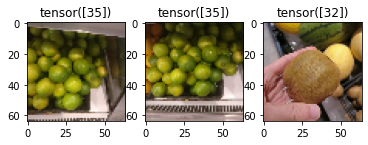

In [37]:
x = 1
for i, data_dict in enumerate(val_dataloader):
    if i==x:
        anc_img = data_dict['anc_img']
        pos_img = data_dict['pos_img']
        neg_img = data_dict['neg_img']
        
        a,p,n = display_data_dict(data_dict)

        print("Anchor & Pos similarity: {}".format(np.sum(np.square(a-p))))
        print("Anchor & Neg similarity: {}".format(np.sum(np.square(a-n))))

        break